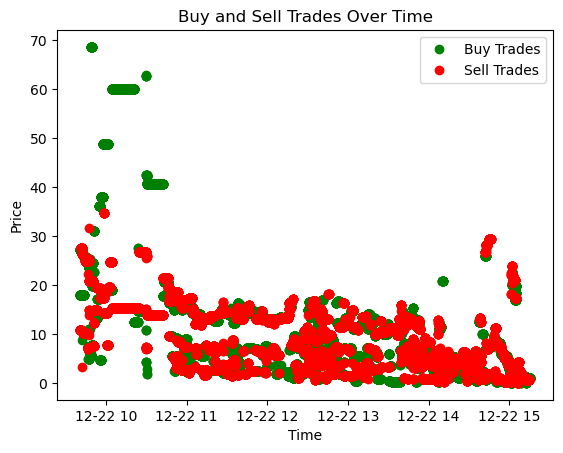

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

midcpnifty_data = df[df['underlying'] == 'MIDCPNIFTY']


buy_data = midcpnifty_data[midcpnifty_data['side'] == 'BUY']
sell_data = midcpnifty_data[midcpnifty_data['side'] == 'SELL']

buy_data = buy_data.copy()
sell_data = sell_data.copy()
buy_data.loc[:, 'time'] = pd.to_datetime(buy_data['time'])
sell_data.loc[:, 'time'] = pd.to_datetime(sell_data['time'])


buy_data = buy_data.drop_duplicates(subset='time')
buy_resampled = buy_data.set_index('time').resample('1S').ffill()

sell_data = sell_data.drop_duplicates(subset='time')
sell_resampled = sell_data.set_index('time').resample('1S').ffill()

plt.plot(buy_resampled.index, buy_resampled['Price'], 'go', label='Buy Trades')
plt.plot(sell_resampled.index, sell_resampled['Price'], 'ro', label='Sell Trades')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Buy and Sell Trades Over Time')
plt.legend()
plt.show()